In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
import time
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("iris.data", sep= ",", header=None, names=["sepal_length","sepal_weight","petal_length","petal_width","class_name"])
data

,sepal_length,sepal_weight,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
le     = preprocessing.LabelEncoder()
data["class"] = le.fit_transform(data["class_name"])

In [4]:
data.head(6)

,sepal_length,sepal_weight,petal_length,petal_width,class_name,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
5,5.4,3.9,1.7,0.4,Iris-setosa,0


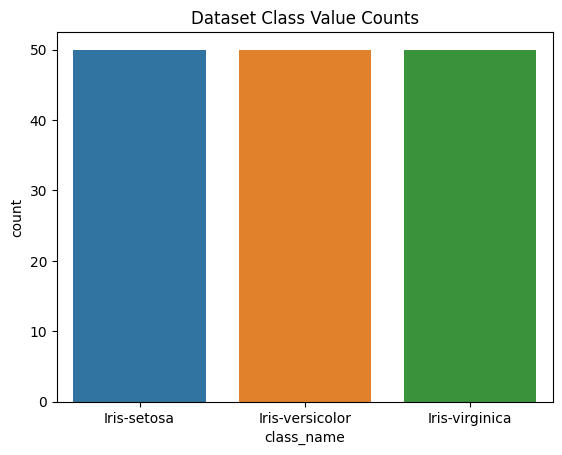

In [5]:
sns.countplot(x= "class_name", data=data)
plt.title("Dataset Class Value Counts")
plt.show()

In [6]:
X = data.iloc[:, :-2].values
y = data.iloc[:, -1].values

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

# Ham data ile train yapalım ve sonra diğer aşamaları göre sonuçları karşılaştıralım

In [8]:
models = [
    LogisticRegression(multi_class='multinomial'),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(criterion='entropy',max_depth=20),
    RandomForestClassifier(n_estimators=110, max_depth=20, criterion='entropy'),
    SVC(),
    MLPClassifier(),
]

models_description = [
    "Logistic Regression",
    "K-Nearest Neigbors",
    "Decision Tree Classifier",
    "Random Forest",
    "Support Vector Machines (SVM)",
    "Neural Network (Multi Layer Perceptron)",
]

In [9]:
results = {}

for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X, y)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.001031
Random Forest,1.000000,1.000000,1.000000,1.000000,0.098489
Neural Network (Multi Layer Perceptron),0.966667,0.973333,0.966667,0.968013,0.060785
Logistic Regression,0.966667,0.968519,0.966667,0.964762,0.019868
K-Nearest Neigbors,0.966667,0.968519,0.966667,0.964762,0.002500
Support Vector Machines (SVM),0.966667,0.968519,0.966667,0.964762,0.000739


# Şimdi bağımsız değişkenlerin etkilerin igözlemleyelim.

In [11]:
x_scaled = StandardScaler().fit_transform(X)

In [12]:
pca = PCA(n_components=4)
 
pca_features = pca.fit_transform(x_scaled)
 
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

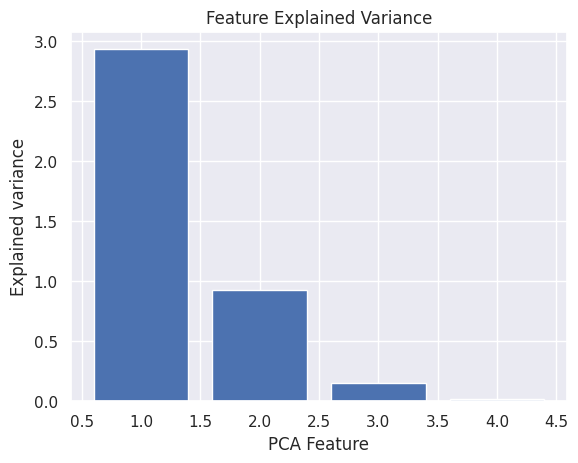

In [13]:
sns.set()

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Bu grafik, bizim kullandığımız 4 özelik yerine 3 özellik kullanmanın doğru olacağını gösteriyor. o halde önce 3 özelliğe indirerek devam edelim

In [14]:
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(x_scaled)

print('PCA öncesi : ', x_scaled.shape)
print('PCA sonrası : ', pca_feat.shape)

PCA öncesi :  (150, 4)
PCA sonrası :  (150, 3)


In [15]:
pca_df = pd.DataFrame(
    data=pca_feat, 
    columns=["sepal_length","sepal_weight","petal_length"])

In [16]:
pca_df["class_name"] = data["class_name"]
pca_df["class"] = y

# 3 özellik ile train yapalım ve sonuçları gözlemleyelim

In [17]:
X = pca_df.iloc[:, :-2].values
y = pca_df.iloc[:, -1].values

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [19]:
results = {}

for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X, y)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Logistic Regression,1.000000,1.000000,1.000000,1.000000,0.005962
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.000923
Random Forest,1.000000,1.000000,1.000000,1.000000,0.110948
Support Vector Machines (SVM),1.000000,1.000000,1.000000,1.000000,0.000794
K-Nearest Neigbors,0.966667,0.968519,0.966667,0.964762,0.002171
Neural Network (Multi Layer Perceptron),0.966667,0.968519,0.966667,0.964762,0.066570


# şimdi etkisi çok az olan 3. özelliği de çıkaralım ve tekrar train yapalım

In [21]:
x_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca_feat = pca.fit_transform(x_scaled)

print('PCA öncesi : ', x_scaled.shape)
print('PCA sonrası : ', pca_feat.shape)

 
pca.explained_variance_

PCA öncesi :  (150, 3)
PCA sonrası :  (150, 2)


array([1.00671141, 1.00671141])

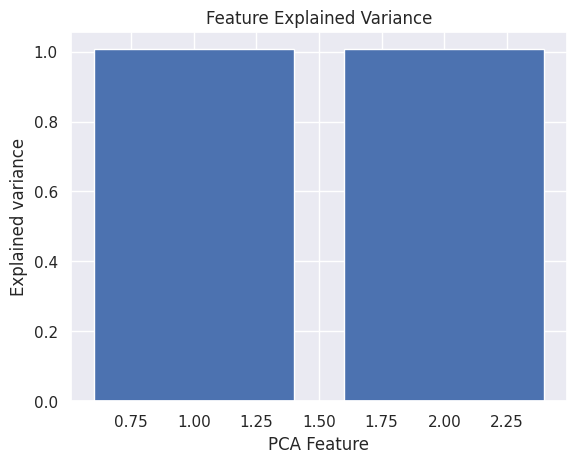

In [22]:
sns.set()

plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [23]:
pca_df = pd.DataFrame(
    data=pca_feat, 
    columns=["sepal_length","sepal_weight"])

In [24]:
pca_df["class_name"] = data["class_name"]
pca_df["class"] = y


# Şimdi elimizde kalan iki özellik ile tekrar train edelim ve sonuçları gözlemleyelim.

In [25]:
X = pca_df.iloc[:, :-2].values
y = pca_df.iloc[:, -1].values

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [27]:
results = {}

for index in range(len(models)):
    start_time = time.time()
    model = models[index]
    model.fit(X, y)

    Y_pred = model.predict(X_test)
    training_time = time.time() - start_time

    results[models_description[index]] = [accuracy_score(Y_test, Y_pred),
                                  precision_score(Y_test, Y_pred, average='weighted'),
                                  recall_score(Y_test, Y_pred, average='weighted'),
                                  f1_score(Y_test, Y_pred, average='weighted'),
                                  training_time]

/home/thecoderman/data/Python Apps/text_classification_eda/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
df_results = pd.DataFrame.from_dict(results, orient='index', columns=["Accuracy", "Precision", "Recall", "F1-Score", "Training Time"] )
df_results.sort_values(by="F1-Score", ascending= False, na_position= "first")

,Accuracy,Precision,Recall,F1-Score,Training Time
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,0.000830
Random Forest,1.000000,1.000000,1.000000,1.000000,0.104101
Support Vector Machines (SVM),0.666667,0.744444,0.666667,0.687748,0.001292
K-Nearest Neigbors,0.600000,0.679487,0.600000,0.626667,0.001478
Logistic Regression,0.600000,0.712083,0.600000,0.623021,0.003555
Neural Network (Multi Layer Perceptron),0.566667,0.620317,0.566667,0.584028,0.065115


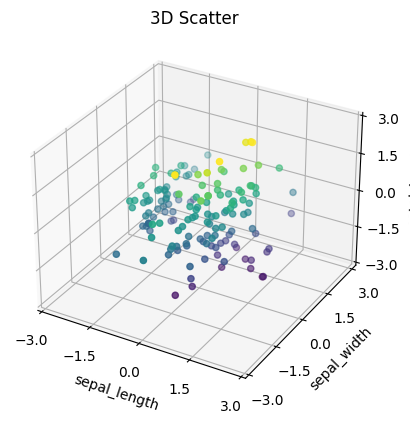

In [29]:
import numpy as np
import matplotlib.pyplot as plt
 
from mpl_toolkits import mplot3d
plt.style.use('default')
 
# Prepare 3D graph
fig = plt.figure()
ax = plt.axes(projection='3d')
 
# Plot scaled features
xdata = x_scaled[:,0]
ydata = x_scaled[:,1]
zdata = x_scaled[:,2]
 
# Plot 3D plot
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')
 
# Plot title of graph
plt.title(f'3D Scatter')
 
# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)
 
# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

# Sonuçlar:
explained_variance_ özelliği, değişkenlerin sonuç üzerinde ki ilişkisini (variance) göstermesi açısından bizim için önemlidir. Buradan hareketle ilk üç değişkenin daha etkili olduğu, 4. değişkenin ise thmin üzerinde ciddi bir etkisi olmadığını görüyoruz. Özellik sayısı önce 3 sonra da ikiye indirildi ve etrain yapıldı. Üç özellikle başarı yukarıya çıkarken iki özellikte başarı düştü. Bu veri seti için en iyi peformans 3 özellik olduğunu söyleyebiliriz.

O halde üç değişkene göre PCA uygulayalım.